# <a id='contents'>Contents</a>

* [Installation](#installation)
* [Introduction](#introduction)
    * [Why Pandas](#why)
    * [Importing](#import)
    * [Without Pandas](#without)
    * [Simple Creation](#create)
* [Similarities with NumPy](#similarities)
    * [Properties of DataFrame and Series](#properties)
    * [Working with Keys](#keys)
    * [Changing Data Types](#astype)
    * [General Description of a Dataset](#description)

# <a id='installation'>Installation</a>

You just need to uncomment and run the below cell. [Pip](https://pypi.org/) is a repository storing Python packages for easier centralized access. Many developers create their own libraries and share them in this platform for particular implementation. Pandas library is one of them and its implementation will be elucidated in further sections. 

In [1]:
# !pip install pandas -q

# <a id='introduction'>Introduction</a>

## <a id='why'>Why Pandas?</a>

During the first 2 tutorials, you should have understood that NumPy arrays usually come with homogenous data type, meaning you only have one data type for a given array (excluding **structured NumPy arrays**). However, real world data is mainly collected in multiple data types, such as string, integer, float, etc. It requires a new data structure to handle this kind of data at satisfying speed. This is one of reasons why data scientists use Pandas package. Furthermore, Pandas DataFrame objects provide more interpretable data structure, such as with labels and indexes (like in Excel). For instance, when we want to read data in excel file, we usually prefer Pandas instead of NumPy. For an addition, Pandas is also written on NumPy, leading to explore similarities between those packages.

## <a id='import'>Importing</a>

By importing, we introduce all methods of the library to our running notebook. Generally accepted notation of Pandas is pd, however, you are not restricted to choose your own notation. In any case, I prefer being stuck with pd. Additionally, we import NumPy package as well for later usage.

In [2]:
import numpy as np
import pandas as pd

## <a id='without'>Without Pandas</a>

Let's say you don't have any understanding of pandas and you want to store the data. You have a variety of options as a way of collecting. The first thing that might come to the mind is list or tuple. When you have data with multiple columns like 2D representation, you should deal with nested lists. However, it is better to name each column as a special data structure instead of having pure lists. Dictionaries are the best in this case unless we are not limited to default data types in Python (unlike external packages like NumPy or Pandas). Let's see one example.

In [2]:
# Don't be surprised if you see your name and surname here.
# I chose student names and surnames from our class who participated in the last lecture session. 
# Age and GPA are randomly-generated

data = {
    'Name': ['Ulkar', 'Turkan', 'Yusif', 'Zulfiyya', 'Mehin', 'Hijran', 'Suleyman', 'Aykhan', 'Ravan', 'Aysun', 'Yasemen', 
             'Fatima', 'Nacmin', 'Parvin', 'Ismayil', 'Malik', 'Bilal', 'Farid', 'Muhammed', 'Rasul', 'Ali', 'Khagani', 
             'Mahammad'
            ],
    'Surname': ['Nabi', 'Purmukhtari', 'Baghirov', 'Mehdiyeva', 'Aliyeva', 'Shukurlu', 'Mammadzade', 'Seyidli', 'Yusifov', 
                'Safarova', 'Mammadli', 'Ahmadzade', 'Asgarov', 'Hasanov', 'Masimov', 'Suleymanov', 'Hagverdiyev', 
                'Mammadov', 'Nuriyev', 'Rasulzade', 'Gasimov', 'Gasimov', 'Mehdi'
               ],
    'Age': [22, 19, 20, 19, 18, 20, 20, 19, 19, 20, 22, 19, 18, 20, 22, 21, 18, 20, 21, 18, 19, 20, 19],
    'GPA': [100,  94,  82,  97,  91,  87,  87,  89,  98,  88,  86,  98,  89, 81,  91,  97,  95,  93,  84,\
            98,  90, 100,  98]
}

We created a dictionary object containing Name, Surname, Age, and GPA keys. What I want is to have the same size of list per key so that the respective indexes can help us to figure out consistencies between columns. See the below examples for the first 5 rows.

In [4]:
def get_data_info(index):
    print('Name:\t\t', data['Name'][index])
    print('Surname:\t', data['Surname'][index])
    print('Age:\t\t', data['Age'][index])
    print('GPA:\t\t', data['GPA'][index])

In [5]:
get_data_info(0)

Name:		 Ulkar
Surname:	 Nabi
Age:		 22
GPA:		 100


In [6]:
get_data_info(1)

Name:		 Turkan
Surname:	 Purmukhtari
Age:		 19
GPA:		 94


In [7]:
get_data_info(2)

Name:		 Yusif
Surname:	 Baghirov
Age:		 20
GPA:		 82


In [8]:
get_data_info(3)

Name:		 Zulfiyya
Surname:	 Mehdiyeva
Age:		 19
GPA:		 97


In [9]:
get_data_info(4)

Name:		 Mehin
Surname:	 Aliyeva
Age:		 18
GPA:		 91


Here are some examples to work on that data. If you might be asked to get the mean of GPA in the class, you can write the following.

In [10]:
round(
    sum(data['GPA'])/len(data['GPA']),
    3
)

91.87

Or the highest GPA:

In [11]:
max(data['GPA'])

100

Okay, but who got the max GPA?

In [12]:
# Determine highest gpa
max_gpa = max(data['GPA'])

# Find the index of that gpa
index = data['GPA'].index(max_gpa)

# Give info about the student
data['Name'][index] + ' ' + data['Surname'][index]

'Ulkar Nabi'

Replacing lists by NumPy arrays can mitigate the number of lines in the code. Let's create the dictionary again.

In [13]:
data = {
    'Name': np.array(['Ulkar', 'Turkan', 'Yusif', 'Zulfiyya', 'Mehin', 'Hijran', 'Suleyman', 'Aykhan', 'Ravan', 'Aysun', 'Yasemen', 
             'Fatima', 'Nacmin', 'Parvin', 'Ismayil', 'Malik', 'Bilal', 'Farid', 'Muhammed', 'Rasul', 'Ali', 'Khagani', 
             'Mahammad'
            ]),
    'Surname': np.array(['Nabi', 'Purmukhtari', 'Baghirov', 'Mehdiyeva', 'Aliyeva', 'Shukurlu', 'Mammadzade', 'Seyidli', 'Yusifov', 
                'Safarova', 'Mammadli', 'Ahmadzade', 'Asgarov', 'Hasanov', 'Masimov', 'Suleymanov', 'Hagverdiyev', 
                'Mammadov', 'Nuriyev', 'Rasulzade', 'Gasimov', 'Gasimov', 'Mehdi'
               ]),
    'Age': np.array([22, 19, 20, 19, 18, 20, 20, 19, 19, 20, 22, 19, 18, 20, 22, 21, 18, 20, 21, 18, 19, 20, 19]),
    'GPA': np.array([100,  94,  82,  97,  91,  87,  87,  89,  98,  88,  86,  98,  89, 81,  91,  97,  95,  93,  84,\
            98,  90, 100,  98])
}

In [14]:
index = data['GPA'].argmax()
data['Name'][index] + ' ' + data['Surname'][index]

'Ulkar Nabi'

In case I want to know the data of all students who got 100:

In [15]:
indexes = np.where(data['GPA'] == 100)[0]
indexes

array([ 0, 21], dtype=int64)

In [16]:
data['Name'][indexes]

array(['Ulkar', 'Khagani'], dtype='<U8')

In [17]:
data['Surname'][indexes]

array(['Nabi', 'Gasimov'], dtype='<U11')

In [18]:
data['Age'][indexes]

array([22, 20])

In [19]:
data['GPA'][indexes]

array([100, 100])

Interpretability of this manipulation is quite low. When you have higher number of elements inside those arrays, you can't analyze easily accordingly. It is difficult to look at their corresponding indexes. 

And even who could understand this?

In [20]:
data

{'Name': array(['Ulkar', 'Turkan', 'Yusif', 'Zulfiyya', 'Mehin', 'Hijran',
        'Suleyman', 'Aykhan', 'Ravan', 'Aysun', 'Yasemen', 'Fatima',
        'Nacmin', 'Parvin', 'Ismayil', 'Malik', 'Bilal', 'Farid',
        'Muhammed', 'Rasul', 'Ali', 'Khagani', 'Mahammad'], dtype='<U8'),
 'Surname': array(['Nabi', 'Purmukhtari', 'Baghirov', 'Mehdiyeva', 'Aliyeva',
        'Shukurlu', 'Mammadzade', 'Seyidli', 'Yusifov', 'Safarova',
        'Mammadli', 'Ahmadzade', 'Asgarov', 'Hasanov', 'Masimov',
        'Suleymanov', 'Hagverdiyev', 'Mammadov', 'Nuriyev', 'Rasulzade',
        'Gasimov', 'Gasimov', 'Mehdi'], dtype='<U11'),
 'Age': array([22, 19, 20, 19, 18, 20, 20, 19, 19, 20, 22, 19, 18, 20, 22, 21, 18,
        20, 21, 18, 19, 20, 19]),
 'GPA': array([100,  94,  82,  97,  91,  87,  87,  89,  98,  88,  86,  98,  89,
         81,  91,  97,  95,  93,  84,  98,  90, 100,  98])}

If we have something like the below as a data structure, analysis becomes dramatically better.

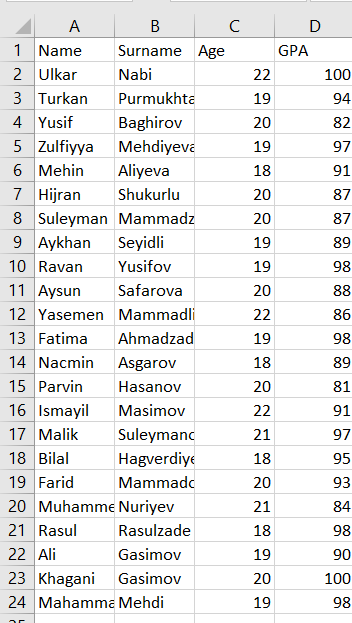

Now, see the below.

In [21]:
df = pd.DataFrame(data)

In [22]:
df

,Name,Surname,Age,GPA
0,Ulkar,Nabi,22,100
1,Turkan,Purmukhtari,19,94
2,Yusif,Baghirov,20,82
3,Zulfiyya,Mehdiyeva,19,97
4,Mehin,Aliyeva,18,91
5,Hijran,Shukurlu,20,87
6,Suleyman,Mammadzade,20,87
7,Aykhan,Seyidli,19,89
8,Ravan,Yusifov,19,98
9,Aysun,Safarova,20,88


Awesome view! We created a DataFrame object by setting its variable name as df (abbreviation). Now, let's bring the previos trials back to the code. I want to know the info about a student who got highest GPA.

In [23]:
index = df['GPA'].argmax()
print(index)

0


In [24]:
df.iloc[[index]]

,Name,Surname,Age,GPA
0,Ulkar,Nabi,22,100


We will get familiar with iloc later. This is just one example to show how convenient to use Pandas.

## <a id='create'>Simple Creation</a>

To create a DataFrame object, we can convert the dictionary to Pandas

In [25]:
# No difference with the previous one. 
data = {
    'Name': ['Ulkar', 'Turkan', 'Yusif', 'Zulfiyya', 'Mehin', 'Hijran', 'Suleyman', 'Aykhan', 'Ravan', 'Aysun', 'Yasemen', 
             'Fatima', 'Nacmin', 'Parvin', 'Ismayil', 'Malik', 'Bilal', 'Farid', 'Muhammed', 'Rasul', 'Ali', 'Khagani', 
             'Mahammad'
            ],
    'Surname': ['Nabi', 'Purmukhtari', 'Baghirov', 'Mehdiyeva', 'Aliyeva', 'Shukurlu', 'Mammadzade', 'Seyidli', 'Yusifov', 
                'Safarova', 'Mammadli', 'Ahmadzade', 'Asgarov', 'Hasanov', 'Masimov', 'Suleymanov', 'Hagverdiyev', 
                'Mammadov', 'Nuriyev', 'Rasulzade', 'Gasimov', 'Gasimov', 'Mehdi'
               ],
    'Age': [22, 19, 20, 19, 18, 20, 20, 19, 19, 20, 22, 19, 18, 20, 22, 21, 18, 20, 21, 18, 19, 20, 19],
    'GPA': [100,  94,  82,  97,  91,  87,  87,  89,  98,  88,  86,  98,  89, 81,  91,  97,  95,  93,  84,\
            98,  90, 100,  98]
}

In [26]:
pd.DataFrame(data)

,Name,Surname,Age,GPA
0,Ulkar,Nabi,22,100
1,Turkan,Purmukhtari,19,94
2,Yusif,Baghirov,20,82
3,Zulfiyya,Mehdiyeva,19,97
4,Mehin,Aliyeva,18,91
5,Hijran,Shukurlu,20,87
6,Suleyman,Mammadzade,20,87
7,Aykhan,Seyidli,19,89
8,Ravan,Yusifov,19,98
9,Aysun,Safarova,20,88


In case you have nested lists,

In [27]:
# The data was randomly chosen
data = [
    # ['Name', 'Surname', 'Age', 'GPA'],
    ['Parvin', 'Hasanov', 20, 81],
    ['Aysun', 'Safarova', 20, 88],
    ['Mahammad', 'Mehdi', 19, 98],
    ['Yusif', 'Baghirov', 20, 82]   
]

In [28]:
pd.DataFrame(data)

,0,1,2,3
0,Parvin,Hasanov,20,81
1,Aysun,Safarova,20,88
2,Mahammad,Mehdi,19,98
3,Yusif,Baghirov,20,82


To indicate columns, you can create a list of column names and input it to the class.

In [5]:
columns = ['Name', 'Surname', 'Age', 'GPA']
import pandas as pd

In [6]:
pd.DataFrame(data, columns=columns)

,Name,Surname,Age,GPA
0,Ulkar,Nabi,22,100
1,Turkan,Purmukhtari,19,94
2,Yusif,Baghirov,20,82
3,Zulfiyya,Mehdiyeva,19,97
4,Mehin,Aliyeva,18,91
5,Hijran,Shukurlu,20,87
6,Suleyman,Mammadzade,20,87
7,Aykhan,Seyidli,19,89
8,Ravan,Yusifov,19,98
9,Aysun,Safarova,20,88


There is also a term called Series data type. The primary difference is we only have 1D instead of 2D unlike DataFrame.  

We only input 1D array or list to Series class and it defines the object as follows.

In [9]:
ages = [20, 20, 19, 20]

In [10]:
pd.Series(ages)

0    20
1    20
2    19
3    20
dtype: int64

You can also input name parameter.

In [11]:
pd.Series(ages, name='Age')

0    20
1    20
2    19
3    20
Name: Age, dtype: int64

Usually, we will not create a DataFrame or Series object like this. Don't worry. This is just basics.

Instead, you will always read the CSV file. read_csv function expects the filepath to the CSV file and it initializes DataFrame object for you.

In [34]:
filepath = 'data/sample.csv'
df = pd.read_csv(filepath)

In [35]:
df

,Name,Surname,Age,GPA
0,Ulkar,Nabi,22,100
1,Turkan,Purmukhtari,19,94
2,Yusif,Baghirov,20,82
3,Zulfiyya,Mehdiyeva,19,97
4,Mehin,Aliyeva,18,91
5,Hijran,Shukurlu,20,87
6,Suleyman,Mammadzade,20,87
7,Aykhan,Seyidli,19,89
8,Ravan,Yusifov,19,98
9,Aysun,Safarova,20,88


head function returns the first **n** rows. In our case, it is 10. By default it returns 5 rows.

In [36]:
df.head(10)

,Name,Surname,Age,GPA
0,Ulkar,Nabi,22,100
1,Turkan,Purmukhtari,19,94
2,Yusif,Baghirov,20,82
3,Zulfiyya,Mehdiyeva,19,97
4,Mehin,Aliyeva,18,91
5,Hijran,Shukurlu,20,87
6,Suleyman,Mammadzade,20,87
7,Aykhan,Seyidli,19,89
8,Ravan,Yusifov,19,98
9,Aysun,Safarova,20,88


In [37]:
df.head()

,Name,Surname,Age,GPA
0,Ulkar,Nabi,22,100
1,Turkan,Purmukhtari,19,94
2,Yusif,Baghirov,20,82
3,Zulfiyya,Mehdiyeva,19,97
4,Mehin,Aliyeva,18,91


You can also access to the last rows.

In [38]:
df.tail(10)

,Name,Surname,Age,GPA
13,Parvin,Hasanov,20,81
14,Ismayil,Masimov,22,91
15,Malik,Suleymanov,21,97
16,Bilal,Hagverdiyev,18,95
17,Farid,Mammadov,20,93
18,Muhammed,Nuriyev,21,84
19,Rasul,Rasulzade,18,98
20,Ali,Gasimov,19,90
21,Khagani,Gasimov,20,100
22,Mahammad,Mehdi,19,98


# <a id='similarities'>Similarities with NumPy</a>

From now on, we will be comparing everything we do in Pandas with NumPy. You will explore a lot of similarities between these packages.

## <a id='properties'>Properties of DataFrame and Series</a>

You know shape and size attributes. We also had dtype attribute, but in Pandas, we use dtypes intead since we might have columns at different data types

In [39]:
# Shape of the data frame
df.shape

(23, 4)

In [40]:
# Size of the data frame
df.size

92

In [41]:
# Checking data types of each column
df.dtypes

Name       object
Surname    object
Age         int64
GPA         int64
dtype: object

In [42]:
# Columns of the data frame
df.columns

Index(['Name', 'Surname', 'Age', 'GPA'], dtype='object')

In [43]:
# Indexes
df.index

RangeIndex(start=0, stop=23, step=1)

You can also have access to NumPy array of the data frame.

In [44]:
arr = df.values
arr

array([['Ulkar', 'Nabi', 22, 100],
       ['Turkan', 'Purmukhtari', 19, 94],
       ['Yusif', 'Baghirov', 20, 82],
       ['Zulfiyya', 'Mehdiyeva', 19, 97],
       ['Mehin', 'Aliyeva', 18, 91],
       ['Hijran', 'Shukurlu', 20, 87],
       ['Suleyman', 'Mammadzade', 20, 87],
       ['Aykhan', 'Seyidli', 19, 89],
       ['Ravan', 'Yusifov', 19, 98],
       ['Aysun', 'Safarova', 20, 88],
       ['Yasemen', 'Mammadli', 22, 86],
       ['Fatima', 'Ahmadzade', 19, 98],
       ['Nacmin', 'Asgarov', 18, 89],
       ['Parvin', 'Hasanov', 20, 81],
       ['Ismayil', 'Masimov', 22, 91],
       ['Malik', 'Suleymanov', 21, 97],
       ['Bilal', 'Hagverdiyev', 18, 95],
       ['Farid', 'Mammadov', 20, 93],
       ['Muhammed', 'Nuriyev', 21, 84],
       ['Rasul', 'Rasulzade', 18, 98],
       ['Ali', 'Gasimov', 19, 90],
       ['Khagani', 'Gasimov', 20, 100],
       ['Mahammad', 'Mehdi', 19, 98]], dtype=object)

In [45]:
arr.dtype

dtype('O')

Accessing to columns

In [46]:
col_age = df['Age']
type(col_age)

pandas.core.series.Series

In [47]:
col_age

0     22
1     19
2     20
3     19
4     18
5     20
6     20
7     19
8     19
9     20
10    22
11    19
12    18
13    20
14    22
15    21
16    18
17    20
18    21
19    18
20    19
21    20
22    19
Name: Age, dtype: int64

In [48]:
df.Age

0     22
1     19
2     20
3     19
4     18
5     20
6     20
7     19
8     19
9     20
10    22
11    19
12    18
13    20
14    22
15    21
16    18
17    20
18    21
19    18
20    19
21    20
22    19
Name: Age, dtype: int64

Transpose of the data frame.

In [49]:
df_T = df.T

In [50]:
df_T

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Name,Ulkar,Turkan,Yusif,Zulfiyya,Mehin,Hijran,Suleyman,Aykhan,Ravan,Aysun,...,Parvin,Ismayil,Malik,Bilal,Farid,Muhammed,Rasul,Ali,Khagani,Mahammad
Surname,Nabi,Purmukhtari,Baghirov,Mehdiyeva,Aliyeva,Shukurlu,Mammadzade,Seyidli,Yusifov,Safarova,...,Hasanov,Masimov,Suleymanov,Hagverdiyev,Mammadov,Nuriyev,Rasulzade,Gasimov,Gasimov,Mehdi
Age,22,19,20,19,18,20,20,19,19,20,...,20,22,21,18,20,21,18,19,20,19
GPA,100,94,82,97,91,87,87,89,98,88,...,81,91,97,95,93,84,98,90,100,98


This time our indexes are previous columns.

In [51]:
df_T.index

Index(['Name', 'Surname', 'Age', 'GPA'], dtype='object')

## <a id='keys'>Working with Keys</a>

It is a similar procedure to indexing in NumPy arrays. Let's see on example about calling first column from the array.

In [52]:
# Name data as a first column
arr[:, 0]

array(['Ulkar', 'Turkan', 'Yusif', 'Zulfiyya', 'Mehin', 'Hijran',
       'Suleyman', 'Aykhan', 'Ravan', 'Aysun', 'Yasemen', 'Fatima',
       'Nacmin', 'Parvin', 'Ismayil', 'Malik', 'Bilal', 'Farid',
       'Muhammed', 'Rasul', 'Ali', 'Khagani', 'Mahammad'], dtype=object)

In [53]:
# We input the name of key to get column
name = df['Name']
name

0        Ulkar
1       Turkan
2        Yusif
3     Zulfiyya
4        Mehin
5       Hijran
6     Suleyman
7       Aykhan
8        Ravan
9        Aysun
10     Yasemen
11      Fatima
12      Nacmin
13      Parvin
14     Ismayil
15       Malik
16       Bilal
17       Farid
18    Muhammed
19       Rasul
20         Ali
21     Khagani
22    Mahammad
Name: Name, dtype: object

You might notice it is Series object. We can also have access to the name of series.

In [54]:
type(name)

pandas.core.series.Series

In [55]:
name.name

'Name'

Another example.

In [56]:
arr[:, 2]

array([22, 19, 20, 19, 18, 20, 20, 19, 19, 20, 22, 19, 18, 20, 22, 21, 18,
       20, 21, 18, 19, 20, 19], dtype=object)

In [57]:
age = df['Age']

In [58]:
age.name

'Age'

In [59]:
age

0     22
1     19
2     20
3     19
4     18
5     20
6     20
7     19
8     19
9     20
10    22
11    19
12    18
13    20
14    22
15    21
16    18
17    20
18    21
19    18
20    19
21    20
22    19
Name: Age, dtype: int64

Continuing with age column, let's assign NumPy array to a variable and see the shape.

In [60]:
age_arr = arr[:, 2]
age_arr.shape

(23,)

In [61]:
# The previou series object's shape
age.shape

(23,)

If you want to obtain a key as a DataFrame object instead of Series, you should input it as a double bracket as below.

In [62]:
# I put 2 inside brackets indicating that I want to add another dimension.
age_arr = arr[:, [2]]

# The shape is (23, 1) not (23, ) 
age_arr.shape

(23, 1)

In [63]:
# Similarly, we use double brackets again.
age = df[['Age']]
age.shape

(23, 1)

In [64]:
# Now, it is a DataFrame
age

,Age
0,22
1,19
2,20
3,19
4,18
5,20
6,20
7,19
8,19
9,20


You can also choose multiple columns. In that case, you definitely get another DataFrame.

In [65]:
arr[:, [1, 2]]

array([['Nabi', 22],
       ['Purmukhtari', 19],
       ['Baghirov', 20],
       ['Mehdiyeva', 19],
       ['Aliyeva', 18],
       ['Shukurlu', 20],
       ['Mammadzade', 20],
       ['Seyidli', 19],
       ['Yusifov', 19],
       ['Safarova', 20],
       ['Mammadli', 22],
       ['Ahmadzade', 19],
       ['Asgarov', 18],
       ['Hasanov', 20],
       ['Masimov', 22],
       ['Suleymanov', 21],
       ['Hagverdiyev', 18],
       ['Mammadov', 20],
       ['Nuriyev', 21],
       ['Rasulzade', 18],
       ['Gasimov', 19],
       ['Gasimov', 20],
       ['Mehdi', 19]], dtype=object)

In [66]:
df[['Surname', 'Age']].head()

,Surname,Age
0,Nabi,22
1,Purmukhtari,19
2,Baghirov,20
3,Mehdiyeva,19
4,Aliyeva,18


In [67]:
# or
column_names = ['Surname', 'Age']
df[column_names].head()

,Surname,Age
0,Nabi,22
1,Purmukhtari,19
2,Baghirov,20
3,Mehdiyeva,19
4,Aliyeva,18


## <a id='astype'>Changing Data Types</a>

Recalling arrays.

In [68]:
gpa = arr[:, 3]

In [69]:
gpa.dtype

dtype('O')

In [70]:
gpa

array([100, 94, 82, 97, 91, 87, 87, 89, 98, 88, 86, 98, 89, 81, 91, 97,
       95, 93, 84, 98, 90, 100, 98], dtype=object)

In [71]:
gpa = gpa.astype(np.int8)
gpa

array([100,  94,  82,  97,  91,  87,  87,  89,  98,  88,  86,  98,  89,
        81,  91,  97,  95,  93,  84,  98,  90, 100,  98], dtype=int8)

In [72]:
gpa.dtype

dtype('int8')

Applying with DataFrame

In [73]:
df.dtypes

Name       object
Surname    object
Age         int64
GPA         int64
dtype: object

In [74]:
df['Age'].astype(np.int8)

0     22
1     19
2     20
3     19
4     18
5     20
6     20
7     19
8     19
9     20
10    22
11    19
12    18
13    20
14    22
15    21
16    18
17    20
18    21
19    18
20    19
21    20
22    19
Name: Age, dtype: int8

As we speak in previous sessions, astype functions returns a new object. So, we need to assign it.

In [75]:
df['Age'] = df['Age'].astype(np.int8)

In [76]:
df.dtypes

Name       object
Surname    object
Age          int8
GPA         int64
dtype: object

## <a id='description'>General Description of a Dataset</a>

From now on, we will be using the Iris flower dataset. It is a dataset about three species of iris, namely Iris setosa, Iris virginica, and Iris versicolor. In total we have 150 samples, each 50 of which belong to one species. There are 4 features, such as sepal length, sepal width, petal length, and petal width.

We start by reading and quick analysis.

In [77]:
df = pd.read_csv('data/Iris.csv')

In [78]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df.shape

(150, 6)

In [80]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In this notebook, we will deal with Numerical Data only. So, let's choose them.

In [106]:
num_df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [107]:
arr = num_df.values

In [83]:
num_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Describe function shows short description of what's going on the data. It returns for each column:
* count - number of non-missing values. If there is any missing data points, they will not be counted. It will be touched on later.
* mean
* std - standard deviation
* min - minimum
* 25% 50% 75% - quantiles. Here 50% quantile is equivalent to median
* max - maximum

In [84]:
num_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's get the returned DataFrame as a new variable and see index and columns.

In [85]:
description = num_df.describe()

In [86]:
description

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [87]:
description.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [88]:
description.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

Each index, in fact, shows different function names except 25%, 50%, and 75% coming from the same function called quantile. Out of the topic for now, but we will paraphrase 50% as median. So, let's get more familiar with these functions.

In [89]:
mean = num_df.mean()
mean

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

In [90]:
type(mean)

pandas.core.series.Series

In [91]:
mean.index

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [92]:
mean.values

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

Mean function returns a series object by default. Each index indicates one column in the data with respective mean value. Others are the same.

In [93]:
num_df.median()

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

In [94]:
num_df.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
dtype: int64

In [95]:
num_df.std()

SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64

In [96]:
num_df.max()

SepalLengthCm    7.9
SepalWidthCm     4.4
PetalLengthCm    6.9
PetalWidthCm     2.5
dtype: float64

In [97]:
num_df.min()

SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.0
PetalWidthCm     0.1
dtype: float64

We can do the same with NumPy array.

In [108]:
np.median(arr, axis=0)

array([5.8 , 3.  , 4.35, 1.3 ])

In [110]:
np.mean(arr, axis=0)

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [111]:
np.min(arr, axis=0)

array([4.3, 2. , 1. , 0.1])

In [112]:
np.max(arr, axis=0)

array([7.9, 4.4, 6.9, 2.5])

In [113]:
np.std(arr, axis=0)

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

The standard deviation might slightly vary in NumPy with respect to Pandas. It is due to the difference in their equation's denominator. We will cover it in statistics, don't worry. 

I will manually create nan data in the DataFrame. Nan in NumPy has a similar meaning to None. It means there is nothing (none). Sometimes, you will have data with missing values which is the issue to be recovered as we can't input any data with uncompleted rows to the model. The picture shows one exemplary scenario for our prior dataset that was manipulated later.

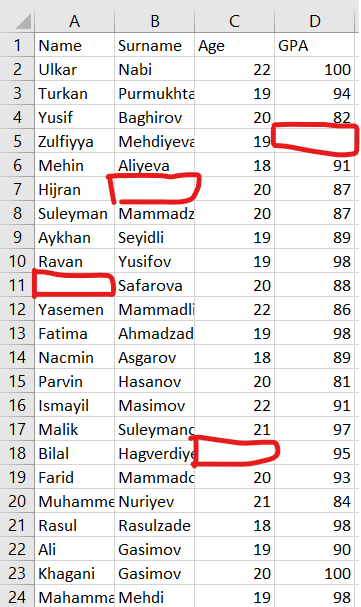

In the next cell, I manually add missing values to the data. In other words, we replace the existing value with np.nan by choosing particular indexes.

In [98]:
arr

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [99]:
np.nan + 3

nan

In [100]:
arr[10, 0] = np.nan

arr[21, 1] = np.nan

arr[56, 2] = np.nan
arr[45, 2] = np.nan

arr[34, 3] = np.nan

# The whole row of nan
arr[30] = np.nan